Group Members: George Wilfert, Jugraj Pandher, Thi Dao Nguyen Pham,
Najm Masri

Data Analysis Group Activity
https://raw.githubusercontent.com/csbfx/cs133/main/anime_ratings.csvLinks to an external site.

Given the dataset above, create four unique plots to answer four different questions. Make sure you are answering the questions either in your plot titles or in a separate text box. Two of the four plots must be categorical plots. At least one question must use map() or apply(). Note that the dataset is not clean to begin with, so you might need to do some cleaning beforehand (refer to Colab_Lec11_Complicated_Data).



You do not have to answer the question you came up with prior to seeing the dataset. However, if you are not answering that question, please include:

Pseudocode/comments of HOW you could go about answering that question (what data processing would you need to do? what additional datasets would you need to find/create? how would you combine the datasets? do you need to reshape your data? do you need to summarize it somehow?)
A sketches of what that visualization might look like. Make sure to label your axes. Because you don't yet have an answer to your research question, please provide at least 2 plots with different titles representing at least 2 different possible answers to the research question.


As a group, create a Google Colab notebook for this activity. Write down all the names of the group members. Share the notebook with everyone in the group. Google Colab only allows one person to edit at a time. Take turns. Be sure to save your work before passing it to the next group member.

Here are the columns in the dataset:

Columns are below:

uid: unique id
title: anime title
synopsis: synopsis
genre: genre
aired: date aired
episodes: number of episodes
popularity: popularity ranking
ranked: rank of quality for each anime as voted by the community
score: score of anime

In [ ]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

anime_url = "https://raw.githubusercontent.com/csbfx/cs133/main/anime_ratings.csv"
anime = pd.read_csv(anime_url)
anime

,Unnamed: 0,uid,title,synopsis,genre,aired,episodes,popularity,ranked,score
0,0,28891,Haikyuu!! Second Season,Following their participation at the Inter-Hig...,"['Comedy', 'Sports', 'Drama', 'School', 'Shoun...","Oct 4, 2015 to Mar 27, 2016",25.0,141,25.0,8.82
1,1,23273,Shigatsu wa Kimi no Uso,Music accompanies the path of the human metron...,"['Drama', 'Music', 'Romance', 'School', 'Shoun...","Oct 10, 2014 to Mar 20, 2015",22.0,28,24.0,8.83
2,2,34599,Made in Abyss,The Abyss—a gaping chasm stretching down into ...,"['Sci-Fi', 'Adventure', 'Mystery', 'Drama', 'F...","Jul 7, 2017 to Sep 29, 2017",13.0,98,23.0,8.83
3,3,5114,Fullmetal Alchemist: Brotherhood,"""In order for something to be obtained, someth...","['Action', 'Military', 'Adventure', 'Comedy', ...","Apr 5, 2009 to Jul 4, 2010",64.0,4,1.0,9.23
4,4,31758,Kizumonogatari III: Reiketsu-hen,After helping revive the legendary vampire Kis...,"['Action', 'Mystery', 'Supernatural', 'Vampire']","Jan 6, 2017",1.0,502,22.0,8.83
...,...,...,...,...,...,...,...,...,...,...
19306,19306,32979,Flip Flappers,Cocona is an average middle schooler living wi...,"['Sci-Fi', 'Adventure', 'Comedy', 'Magic']","Oct 6, 2016 to Dec 29, 2016",13.0,843,1070.0,7.73
19307,19307,123,Fushigi Yuugi,"While visiting the National Library, junior-hi...","['Adventure', 'Fantasy', 'Magic', 'Martial Art...","Apr 6, 1995 to Mar 28, 1996",52.0,1292,1071.0,7.73
19308,19308,1281,Gakkou no Kaidan,"Years ago, all of the ghosts in a haunted scho...","['Mystery', 'Horror', 'Supernatural']","Oct 22, 2000 to Mar 25, 2001",19.0,1314,1073.0,7.73
19309,19309,450,InuYasha Movie 2: Kagami no Naka no Mugenjo,Inuyasha and company have finally destroyed Na...,"['Action', 'Adventure', 'Comedy', 'Historical'...","Dec 21, 2002",1.0,1469,1077.0,7.73


<ipython-input-24-4933c997e1e3>:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_popularity.index, y=genre_popularity.values, palette='viridis')


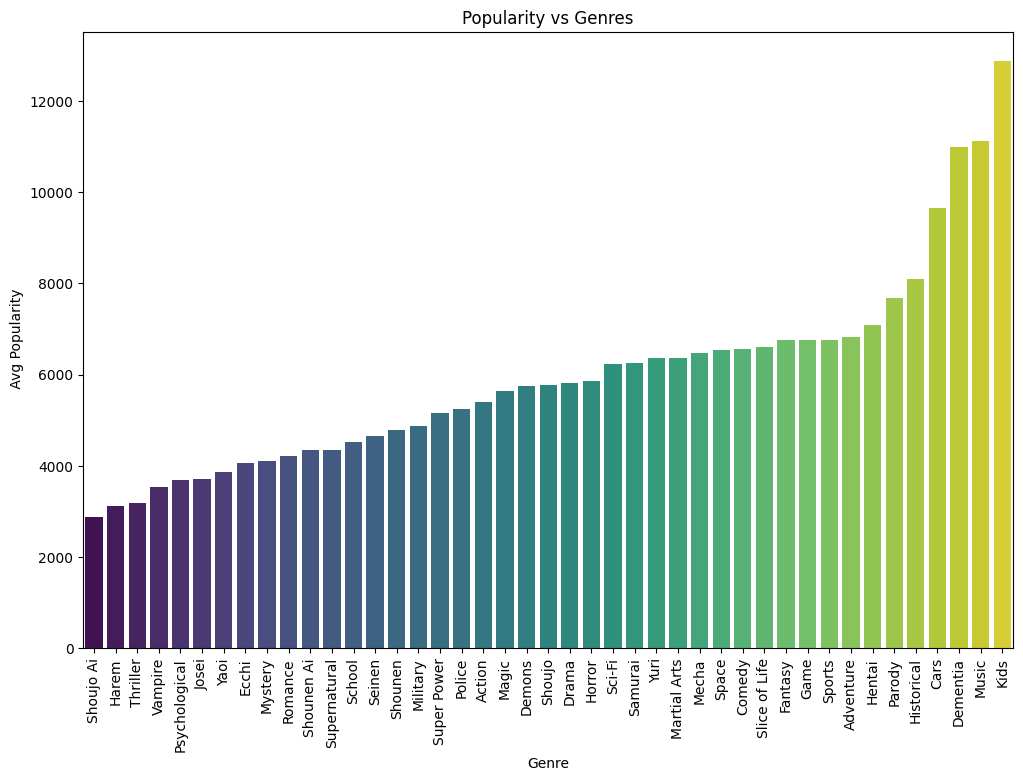

In [ ]:
# Which genres have the highest average popularity among movies?

import ast

#convert the 'genre' column from string representation of lists to actual lists
anime['genre'] = anime['genre'].apply(ast.literal_eval)
genre_exploded = anime.explode('genre')
genre_counts = genre_exploded['genre'].value_counts()

#group by genre and calculate the average popularity for each genre
genre_popularity = genre_exploded.groupby('genre')['popularity'].mean().sort_values()

#explode the dataframe so each genre has its own row
df = anime.explode('genre')

#strip leading/trailing spaces from genres
df['genre'] = df['genre'].str.strip()

#group by genre and calculate the average popularity
genre_popularity = df.groupby('genre')['popularity'].mean().sort_values()

plt.figure(figsize=(12, 8))
sns.barplot(x=genre_popularity.index, y=genre_popularity.values, palette='viridis')
plt.xticks(rotation=90)
plt.title('Popularity vs Genres')
plt.xlabel('Genre')
plt.ylabel(' Avg Popularity')
plt.show()

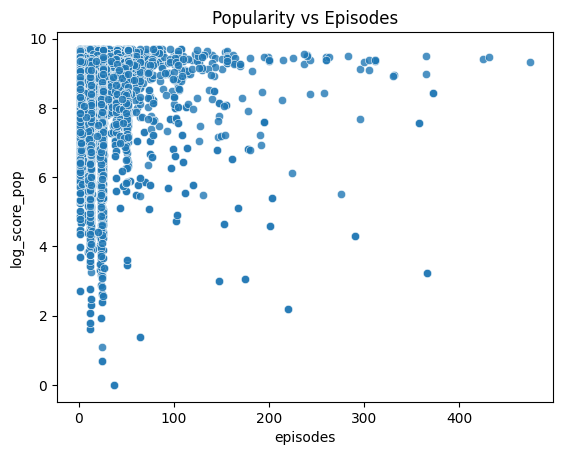

In [ ]:
# how does popularity relate to the number of episodes a anime has given took a log transformation to show relationship better
import numpy as np
from math import log
anime1 = anime

anime1["log_score_pop"] = anime1.popularity.apply(lambda x: log(x))
anime1 = anime1[anime1['episodes'] < 500 ]
sns.scatterplot(data=anime1, x="episodes", y="log_score_pop",alpha=.8)
plt.title("Popularity vs Episodes")
plt.show()



<Figure size 1400x700 with 0 Axes>

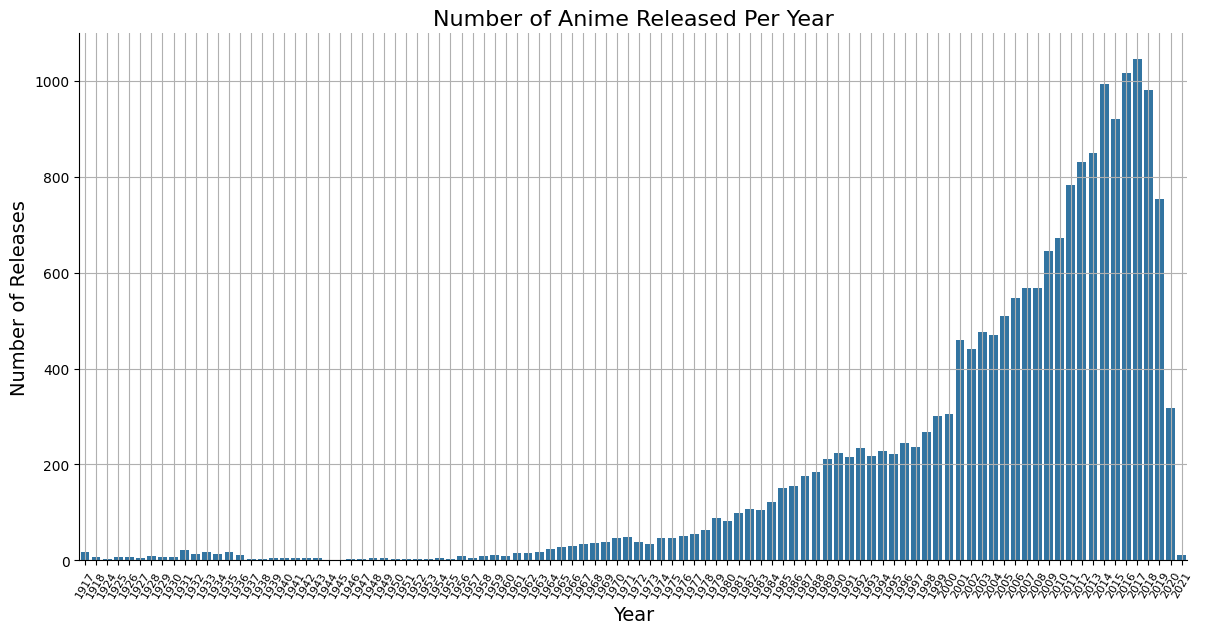

In [ ]:
#How has the amount of animes released per year changed over time?
anime["Release Year"] = anime['aired'].str.extract(r'(\d{4})').astype(float)
anime = anime.dropna(subset=['Release Year'])
yearlyCounts = anime["Release Year"].value_counts().reset_index()
yearlyCounts
yearlyCounts.columns = ['Year', 'Number of Releases']
yearlyCounts = yearlyCounts.sort_values('Year')
yearlyCounts["Year"] = yearlyCounts["Year"].astype(int)
plt.figure(figsize=(14, 7))
sns.catplot(data=yearlyCounts, x='Year', y='Number of Releases', kind='bar', height=6, aspect=2)

plt.title('Number of Anime Released Per Year', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Number of Releases', fontsize=14)
plt.xticks(fontsize=8, rotation=60)
plt.grid()

plt.show()

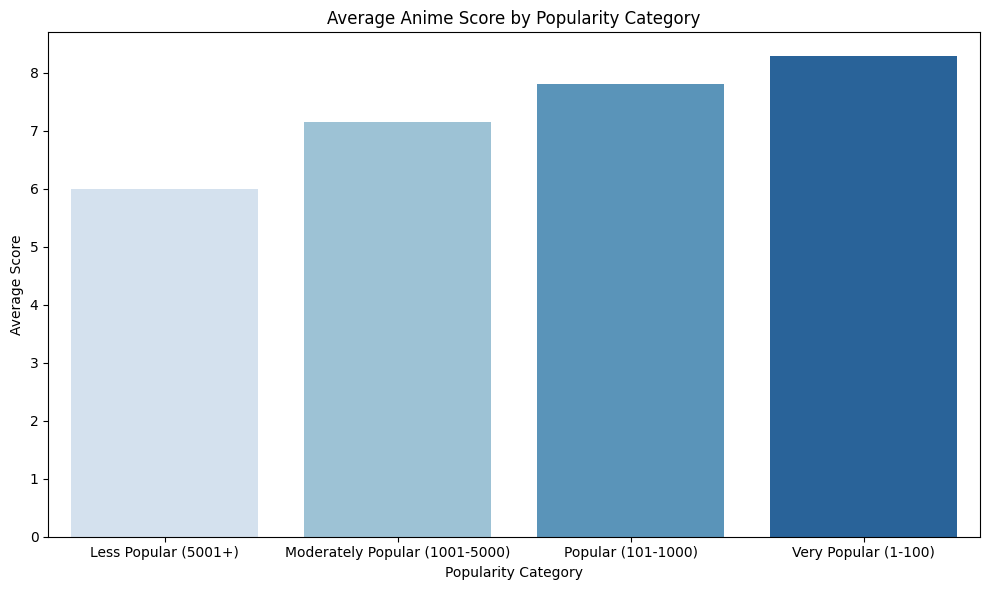

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#Question: What is the relationship between the popularity ranking and the score of anime?


# Define a function to categorize the popularity rankings
def categorize_popularity(popularity):
    if popularity <= 100:
        return 'Very Popular (1-100)'
    elif popularity <= 1000:
        return 'Popular (101-1000)'
    elif popularity <= 5000:
        return 'Moderately Popular (1001-5000)'
    else:
        return 'Less Popular (5001+)'

# Apply the function to create a popularity category
anime['popularity_category'] = anime['popularity'].apply(categorize_popularity)

# Group the data by popularity category and calculate the average score
avg_score_by_popularity = anime.groupby('popularity_category')['score'].mean().reset_index()

# Create a categorical plot
plt.figure(figsize=(10, 6))
sns.barplot(data=avg_score_by_popularity, x='popularity_category', y='score', hue='popularity_category', palette='Blues', dodge=False, legend=False)
plt.title('Average Anime Score by Popularity Category')
plt.xlabel('Popularity Category')
plt.ylabel('Average Score')
plt.tight_layout()
plt.show()